In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [21]:
dogs =  os.listdir('PetImages\dog\dog')
cats =  os.listdir('PetImages\cat\cat')



In [22]:
print('Number of with mask images:', len(dogs))
print('Number of without mask images:', len(cats))

Number of with mask images: 500
Number of without mask images: 500


In [23]:
dogs_label=[1]*500
cats_label=[0]*500

In [24]:
labels = dogs_label + cats_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


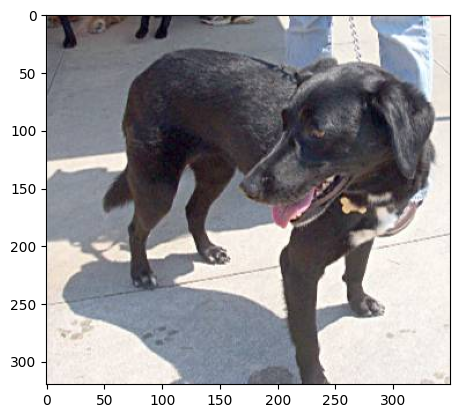

In [25]:
img = mpimg.imread('PetImages\dog\dog/400.jpg')
imgplot = plt.imshow(img)

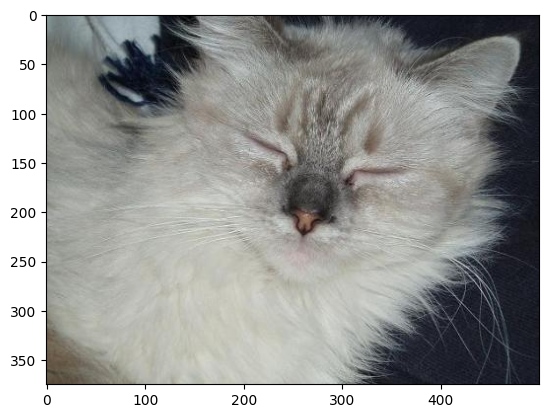

In [26]:
img = mpimg.imread('PetImages\cat\cat/400.jpg')
imgplot = plt.imshow(img)

In [32]:
# convert images to numpy arrays+

dogs_path = 'PetImages\dog\dog/'

data_animal = []

for img in dogs:

  image = Image.open(dogs_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data_animal.append(image)



cats_path = 'PetImages\cat\cat/'


for img in cats:

  image = Image.open(cats_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data_animal.append(image)

In [33]:
X = np.array(data_animal)
Y = np.array(labels)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2) 

In [109]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))


model.add(keras.layers.Dense(128, activation='relu'))



model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [110]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [111]:

model.fit(X_train, Y_train, validation_split=0.2, epochs=10)

Epoch 1/10
20/20 [==============================] - 3s 129ms/step - loss: 2321.2424 - acc: 0.5125 - val_loss: 115.5981 - val_acc: 0.5625
Epoch 2/10
20/20 [==============================] - 2s 117ms/step - loss: 503.4114 - acc: 0.5000 - val_loss: 733.3608 - val_acc: 0.4500
Epoch 3/10
20/20 [==============================] - 2s 117ms/step - loss: 289.9120 - acc: 0.5281 - val_loss: 167.2850 - val_acc: 0.4938
Epoch 4/10
20/20 [==============================] - 2s 115ms/step - loss: 195.4131 - acc: 0.5203 - val_loss: 325.5863 - val_acc: 0.5500
Epoch 5/10
20/20 [==============================] - 2s 115ms/step - loss: 194.9974 - acc: 0.5531 - val_loss: 141.3510 - val_acc: 0.5562
Epoch 6/10
20/20 [==============================] - 2s 117ms/step - loss: 226.1217 - acc: 0.5484 - val_loss: 346.3760 - val_acc: 0.4563
Epoch 7/10
20/20 [==============================] - 2s 118ms/step - loss: 141.2137 - acc: 0.5938 - val_loss: 164.5107 - val_acc: 0.5688
Epoch 8/10
20/20 [=============================

In [113]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

7/7 [==============================] - 0s 12ms/step - loss: 83.4563 - acc: 0.4950
Test Accuracy = 0.4950000047683716


1/1 [==============================] - 0s 23ms/step
[[1. 1.]]
0
It is A Cat


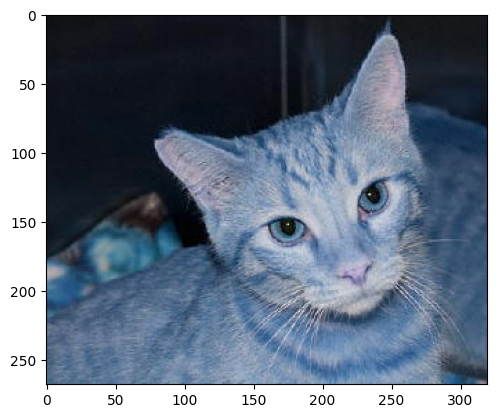

In [114]:
input_image_path = 'PetImages\cat\cat/14.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('It is A Dog')

else:

  print('It is A Cat')